In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13','column 14','column 15','column 16','column 17','column 18','column 19','column 20','column 21','column 22','column 23','column 24','column 25','column 26','column 27','column 28','column 29','column 30','column 31','column 32','column 33','column 34']
df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Incomplete Datasets\Incomplete Datasets Without Labels\Ionosphere\Ionosphere_AG_20.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300
1,1,0,1.00000,-0.18829,NaN,-0.36156,NaN,-0.93597,NaN,-0.04549,...,NaN,-0.26569,NaN,NaN,NaN,-0.11593,NaN,-0.06288,NaN,NaN
2,1,0,1.00000,-0.03365,NaN,0.00485,NaN,-0.12062,NaN,0.01198,...,NaN,-0.40220,NaN,-0.22145,NaN,-0.17365,NaN,-0.24180,NaN,NaN
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000
4,1,0,1.00000,-0.02401,NaN,0.06531,NaN,-0.23255,NaN,-0.16399,...,NaN,-0.65158,NaN,-0.53206,NaN,-0.62197,NaN,-0.59573,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0,0.83508,0.08298,NaN,-0.14706,NaN,-0.05567,NaN,-0.04622,...,NaN,-0.04202,NaN,0.00123,NaN,0.12815,NaN,-0.10714,NaN,NaN
347,1,0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,...,0.94520,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712
348,1,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,...,0.93988,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577
349,1,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,...,0.91050,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
int64		column 1	0
int64		column 2	0
float64		column 3	34
float64		column 4	0
float64		column 5	138
float64		column 6	0
float64		column 7	138
float64		column 8	0
float64		column 9	138
float64		column 10	68
float64		column 11	138
float64		column 12	36
float64		column 13	102
float64		column 14	34
float64		column 15	70
float64		column 16	0
float64		column 17	104
float64		column 18	0
float64		column 19	138
float64		column 20	0
float64		column 21	138
float64		column 22	68
float64		column 23	138
float64		column 24	0
float64		column 25	138
float64		column 26	34
float64		column 27	104
float64		column 28	36
float64		column 29	138
float64		column 30	68
float64		column 31	138
float64		column 32	0
float64		column 33	138
float64		column 34	70


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
count,351.000000,351.0,317.000000,351.000000,213.000000,351.000000,213.000000,351.000000,213.000000,283.000000,...,213.000000,317.000000,247.000000,315.000000,213.000000,283.000000,213.000000,351.000000,213.000000,281.000000
mean,0.891738,0.0,0.633841,0.044372,0.601641,0.115889,0.564196,0.119360,0.486161,0.189172,...,0.400471,-0.065029,0.530967,-0.063882,0.383669,-0.031714,0.361308,-0.003794,0.375662,0.008839
std,0.311155,0.0,0.502588,0.441435,0.482040,0.460810,0.455815,0.520750,0.511874,0.487864,...,0.558358,0.506419,0.523448,0.543893,0.563819,0.501561,0.531591,0.513574,0.496694,0.451226
min,0.000000,0.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,1.000000,0.0,0.444440,-0.064735,0.412450,-0.024795,0.256610,-0.054840,0.057170,-0.050320,...,0.000000,-0.300630,0.312980,-0.407115,0.000000,-0.226985,0.000000,-0.242595,0.000000,-0.133050
50%,1.000000,0.0,0.868890,0.016310,0.770370,0.022800,0.722430,0.014710,0.653580,0.023940,...,0.537500,-0.015350,0.687750,-0.016470,0.525730,0.000000,0.439700,0.000000,0.433960,0.000000
75%,1.000000,0.0,1.000000,0.194185,0.997930,0.334655,0.951770,0.445675,0.928710,0.591395,...,0.884870,0.148030,0.972570,0.157805,0.859770,0.150430,0.814290,0.200120,0.800880,0.166670
max,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

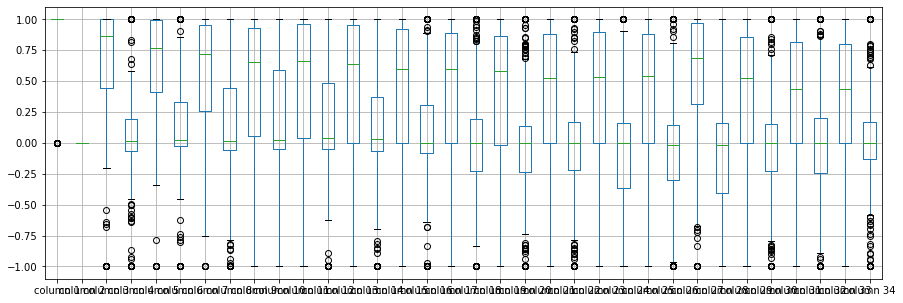

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1     0.891738
column 2     0.000000
column 3     0.633841
column 4     0.044372
column 5     0.601641
column 6     0.115889
column 7     0.564196
column 8     0.119360
column 9     0.486161
column 10    0.189172
column 11    0.473311
column 12    0.164966
column 13    0.384767
column 14    0.095948
column 15    0.349640
column 16    0.071132
column 17    0.371457
column 18   -0.003617
column 19    0.349324
column 20   -0.024025
column 21    0.352879
column 22    0.004046
column 23    0.365989
column 24   -0.057406
column 25    0.400471
column 26   -0.065029
column 27    0.530967
column 28   -0.063882
column 29    0.383669
column 30   -0.031714
column 31    0.361308
column 32   -0.003794
column 33    0.375662
column 34    0.008839
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
column 1,1.000000,NaN,0.295612,-0.006529,0.060233,0.127606,0.118569,0.027079,0.027156,-0.033830,...,-0.050920,0.096558,-0.096046,-0.000856,0.004392,-0.087446,0.160570,-0.100914,0.072271,0.032129
column 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
column 3,0.295612,NaN,1.000000,0.173828,0.490242,0.029914,0.494335,0.018742,0.487589,0.056249,...,0.278225,-0.095858,0.101889,0.153967,0.406159,0.042866,0.327549,0.006987,0.295560,0.031825
column 4,-0.006529,NaN,0.173828,1.000000,-0.007040,-0.190308,-0.102405,0.255003,-0.265146,0.227876,...,-0.196708,-0.214447,-0.057240,0.010463,0.038437,0.326956,-0.161690,-0.122788,-0.160886,0.066453
column 5,0.060233,NaN,0.490242,-0.007040,1.000000,0.079652,0.625900,-0.020934,0.422735,0.057584,...,0.247620,0.048970,0.156479,0.188788,0.324960,0.006754,0.460130,-0.025917,0.392629,-0.055310
column 6,0.127606,NaN,0.029914,-0.190308,0.079652,1.000000,0.042382,0.274747,-0.282936,0.247657,...,-0.199973,-0.012386,-0.197022,-0.038163,-0.117539,-0.147839,-0.114999,0.316802,-0.006078,0.113737
column 7,0.118569,NaN,0.494335,-0.102405,0.625900,0.042382,1.000000,-0.150001,0.534455,-0.139754,...,0.320257,0.137660,0.222567,0.142257,0.323075,-0.045496,0.366736,0.085971,0.591576,0.013595
column 8,0.027079,NaN,0.018742,0.255003,-0.020934,0.274747,-0.150001,1.000000,-0.289231,0.397070,...,-0.152750,-0.144265,-0.290069,0.110186,-0.075510,0.039118,-0.112274,0.152381,-0.141790,0.394319
column 9,0.027156,NaN,0.487589,-0.265146,0.422735,-0.282936,0.534455,-0.289231,1.000000,-0.276974,...,0.415060,0.150326,0.175209,0.240247,0.279669,0.031746,0.428035,-0.114912,0.340251,-0.113011
column 10,-0.033830,NaN,0.056249,0.227876,0.057584,0.247657,-0.139754,0.397070,-0.276974,1.000000,...,-0.244790,-0.053253,-0.273653,0.089629,-0.085812,-0.032097,-0.121687,-0.033228,-0.182056,0.068177


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [34,34+14,34+14+14,34+14+14+14,34+14+14+14+14,34+14+14+14,34+14+14,34+14,34], vae_layer = False, seed = 140)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [34]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 15.696951184953962
Epoch: 1 , loss: 15.559151831127348
Epoch: 2 , loss: 15.709407942635673
Epoch: 3 , loss: 15.585136413574219
Epoch: 4 , loss: 15.608756065368652
Epoch: 5 , loss: 15.599504107520694
Epoch: 6 , loss: 15.605041367667061
Epoch: 7 , loss: 15.619998931884766
Epoch: 8 , loss: 15.543464933122907
Epoch: 9 , loss: 15.635866165161133
Epoch: 10 , loss: 15.334768976484026
Epoch: 11 , loss: 15.51921658288865
Epoch: 12 , loss: 15.317116283235096
Epoch: 13 , loss: 15.320700463794527
Epoch: 14 , loss: 15.175944691612607
Epoch: 15 , loss: 15.091005098252069
Epoch: 16 , loss: 14.990633873712449
Epoch: 17 , loss: 14.503919556027366
Epoch: 18 , loss: 14.037256059192476
Epoch: 19 , loss: 13.726686613900322
Epoch: 20 , loss: 13.520529383704776
Epoch: 21 , loss: 13.665380069187709
Epoch: 22 , loss: 13.621683438618978
Epoch: 23 , loss: 13.544241950625466
Epoch: 24 , loss: 13.627886000133696
Epoch: 25 , loss: 

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(351, 34)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     0.000000
column 2     0.000000
column 3     1.000000
column 4     1.000000
column 5     0.220259
column 6     0.000000
column 7     0.222349
column 8     0.000000
column 9     0.200558
column 10   -1.000000
column 11    0.209713
column 12    0.000000
column 13    0.182583
column 14    0.023322
column 15    0.180050
column 16   -1.000000
column 17   -1.000000
column 18   -1.000000
column 19    0.171871
column 20    1.000000
column 21    0.174501
column 22    0.011467
column 23    0.177277
column 24    0.000000
column 25    0.179950
column 26    0.000000
column 27    0.213557
column 28   -1.000000
column 29    0.168019
column 30    1.000000
column 31    0.158572
column 32    1.000000
column 33    0.162612
column 34    0.006847
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Original Datasets (1)\Original Datasets Without Labels\Ionosphere.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,0,0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000
1,0,0,0.0,0.0,-0.594350,0.0,0.446630,0.0,-0.690632,0.0,...,0.486875,0.0,0.536863,0.181961,0.454039,0.0,0.412615,0.0,0.385799,0.040280
2,0,0,0.0,0.0,-0.637272,0.0,-0.628925,0.0,-0.553000,0.0,...,-0.274710,0.0,-0.235639,0.000000,-0.149362,0.0,-0.339795,0.0,-0.285900,0.398421
3,0,0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000
4,0,0,0.0,0.0,-0.614378,0.0,-0.585692,0.0,-0.464132,0.0,...,0.244318,0.0,0.190250,0.000000,0.233925,0.0,0.293960,0.0,0.290589,0.674545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,0,0,0.0,0.0,-0.402719,0.0,-0.506333,0.0,-0.598665,0.0,...,-0.666166,0.0,-0.499215,0.000000,-0.729581,0.0,-0.627239,0.0,-0.653654,0.056367
347,0,0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000
348,0,0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000
349,0,0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
numerator

27.9065131871426

In [17]:
denominator=Frobenius_norm(complete_df)
denominator

68.46016929900117

In [18]:
NRMS=numerator/denominator
NRMS


0.40763137855035597

In [19]:
new_df.iloc[66,:]

column 1     1.00000
column 2     0.00000
column 3     1.00000
column 4     0.28046
column 5     1.00000
column 6     0.02477
column 7     1.00000
column 8     0.07764
column 9     1.00000
column 10    0.04317
column 11    0.98762
column 12    0.33266
column 13    1.00000
column 14    0.05489
column 15    1.00000
column 16    0.04384
column 17    0.95750
column 18   -0.24598
column 19    0.84371
column 20   -0.08668
column 21    1.00000
column 22    0.04150
column 23    0.99933
column 24    0.27376
column 25    1.00000
column 26   -0.39056
column 27    0.96414
column 28   -0.02174
column 29    0.86747
column 30    0.23360
column 31    0.94578
column 32   -0.22021
column 33    0.80355
column 34   -0.07329
Name: 66, dtype: float64

In [20]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,1,0,0.99539,-0.05889,0.852430,0.02306,0.833980,-0.37708,1.000000,0.03760,...,0.568110,-0.51171,0.410780,-0.461680,0.212660,-0.34090,0.422670,-0.54487,0.186410,-0.453000
1,1,0,1.00000,-0.18829,0.336000,-0.36156,0.337950,-0.93597,0.309368,-0.04549,...,0.283555,-0.26569,0.332183,-0.002049,0.263639,-0.11593,0.246355,-0.06288,0.248419,0.015810
2,1,0,1.00000,-0.03365,0.362728,0.00485,0.371075,-0.12062,0.336650,0.01198,...,0.300570,-0.40220,0.354201,-0.221450,0.281638,-0.17365,0.264565,-0.24180,0.274550,0.016041
3,1,0,1.00000,-0.45161,1.000000,1.00000,0.712160,-1.00000,0.000000,0.00000,...,1.000000,0.90695,0.516130,1.000000,1.000000,-0.20099,0.256820,1.00000,-0.323820,1.000000
4,1,0,1.00000,-0.02401,0.327022,0.06531,0.335368,-0.23255,0.307388,-0.16399,...,0.277178,-0.65158,0.323150,-0.532060,0.258235,-0.62197,0.236890,-0.59573,0.244509,0.017575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0,0.83508,0.08298,0.334671,-0.14706,0.337157,-0.05567,0.305745,-0.04622,...,0.287614,-0.04202,0.335575,0.001230,0.270419,0.12815,0.239361,-0.10714,0.251806,0.013297
347,1,0,0.95113,0.00419,0.951830,-0.02723,0.934380,-0.01920,0.945900,0.01606,...,0.945200,0.01361,0.935220,0.049250,0.931590,0.08168,0.940660,-0.00035,0.914830,0.047120
348,1,0,0.94701,-0.00034,0.932070,-0.03227,0.951770,-0.03431,0.955840,0.02446,...,0.939880,0.03193,0.924890,0.025420,0.921200,0.02242,0.924590,0.00442,0.926970,-0.005770
349,1,0,0.90608,-0.01657,0.981220,-0.01989,0.956910,-0.03646,0.857460,0.00110,...,0.910500,-0.02099,0.891470,-0.077600,0.829830,-0.17238,0.960220,-0.03757,0.874030,-0.162430


In [21]:
imputations[-1].to_excel("Ionosphere_AG_20(imp).xlsx", index=False, header=False)